In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('/content/50_Startups.csv')

In [ ]:
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [ ]:
print(data.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (50) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (50) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (50) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (50) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3

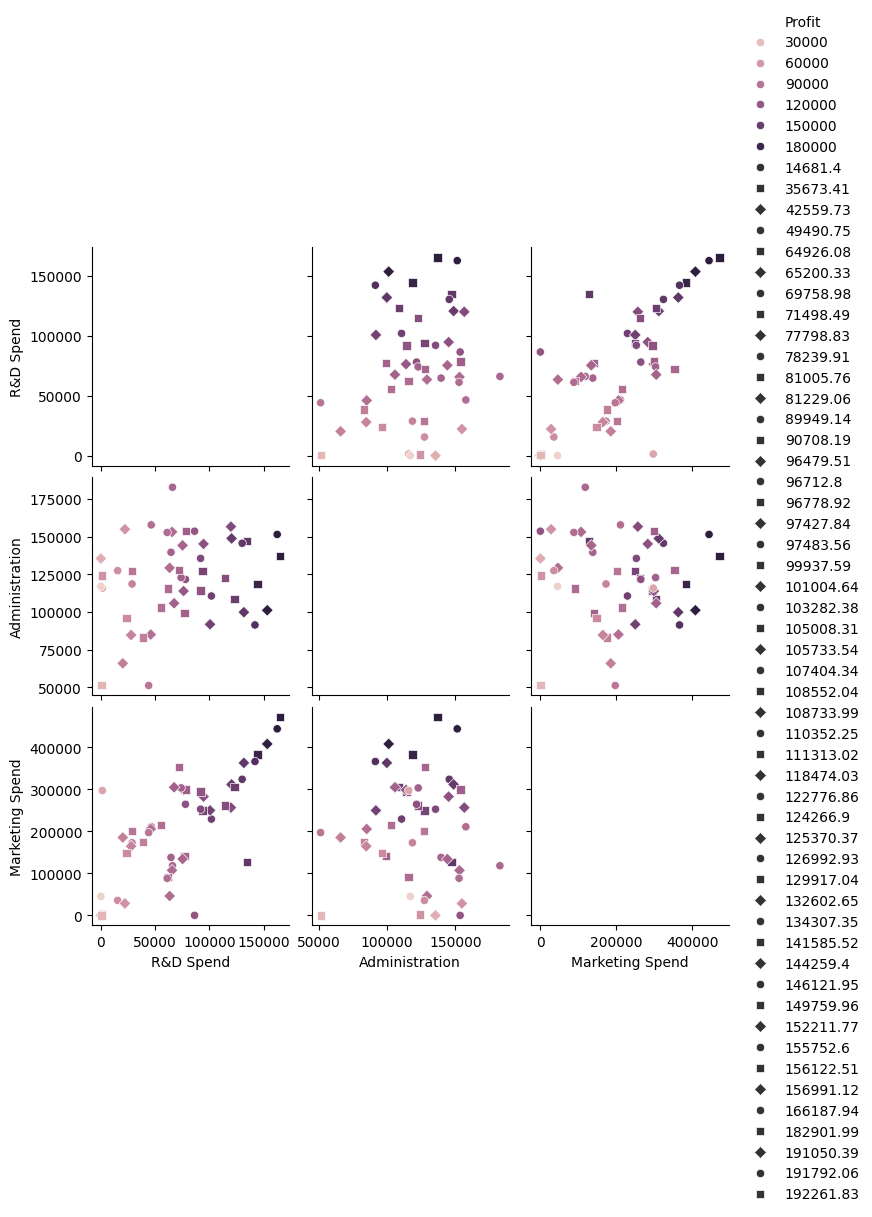

In [6]:
sns.pairplot(data, kind="scatter", hue="Profit", markers=["o", "s", "D"])
plt.show()

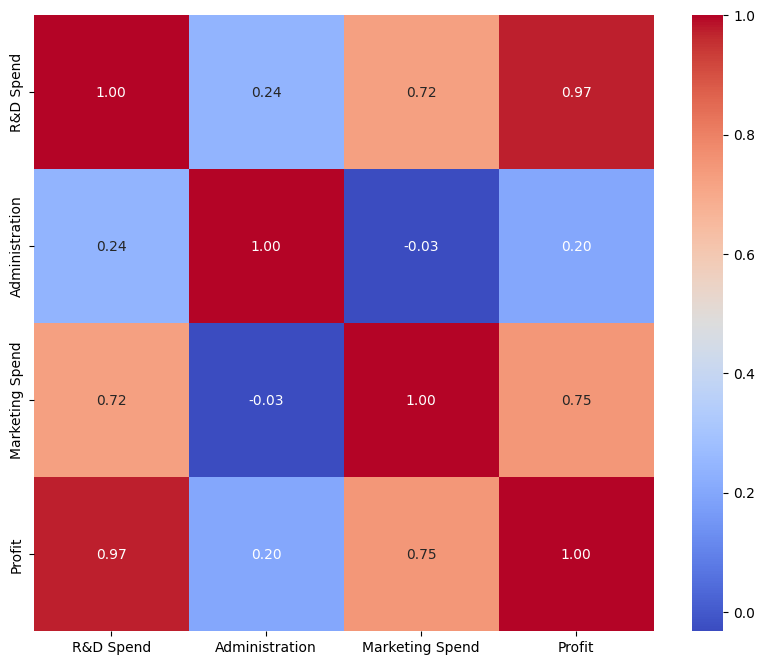

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

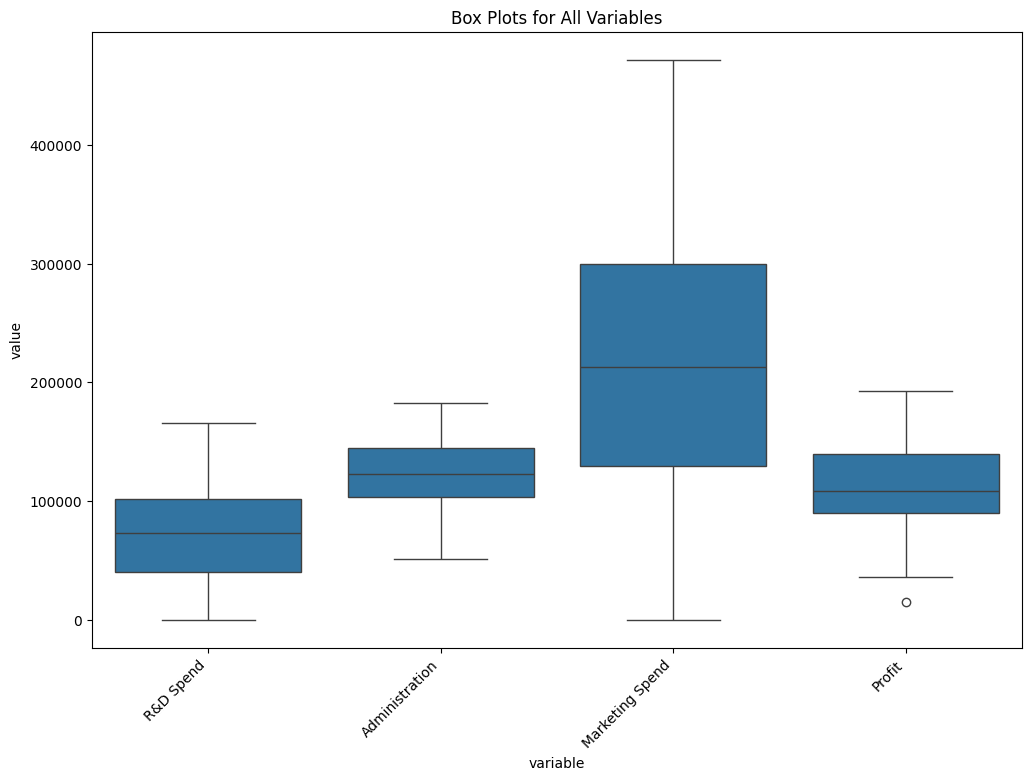

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt the DataFrame to long format
data_melt = pd.melt(data, id_vars=['State'], value_vars=['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'])

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=data_melt)
plt.title('Box Plots for All Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

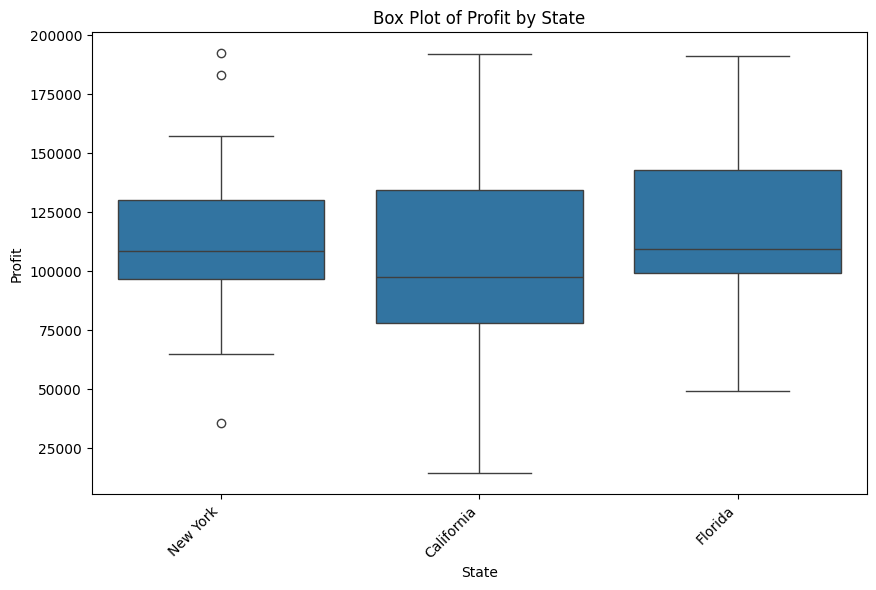

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot for 'Profit' grouped by 'State'
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x='State', y='Profit', data=data)
plt.title('Box Plot of Profit by State')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

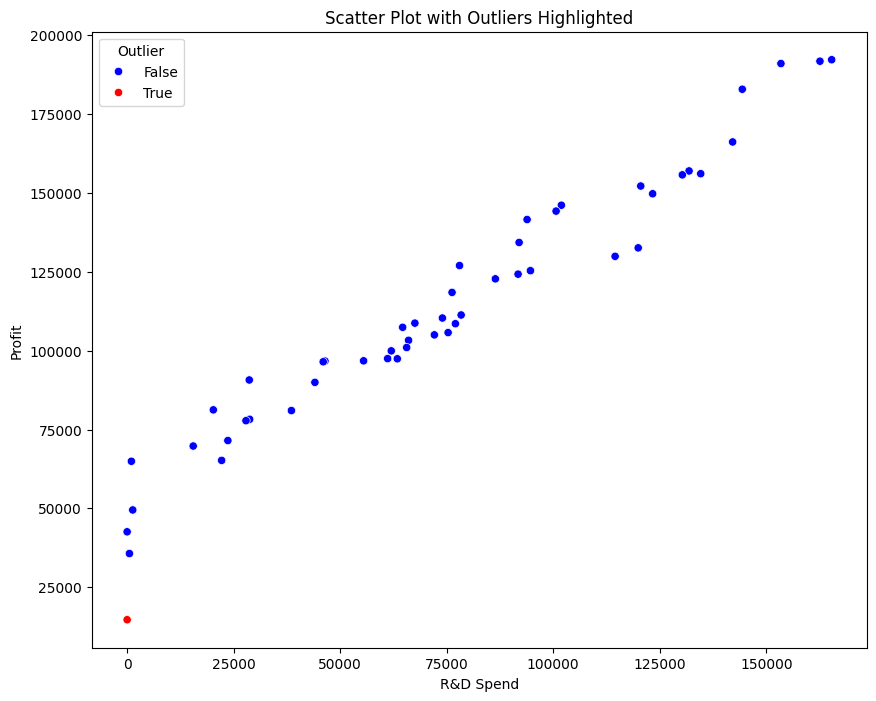

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for each numerical column
Q1 = data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].quantile(0.25)
Q3 = data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def is_outlier(row):
    for col in ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']:
        if (row[col] < (Q1[col] - 1.5 * IQR[col])) or (row[col] > (Q3[col] + 1.5 * IQR[col])):
            return True
    return False

# Identify outliers
data['Outlier'] = data.apply(is_outlier, axis=1)

# Create the scatter plot with highlighted outliers
plt.figure(figsize=(10, 8))
sns.scatterplot(x='R&D Spend', y='Profit', hue='Outlier', data=data, palette={True: 'red', False: 'blue'})
plt.title('Scatter Plot with Outliers Highlighted')
plt.show()

In [15]:
#FEATURE ENGINEERING
import pandas as pd


# Create a new feature: Total Spending
data['Total Spending'] = data['R&D Spend'] + data['Administration'] + data['Marketing Spend']

# Display the updated DataFrame
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit  Outlier  \
0  165349.20       136897.80        471784.10    New York  192261.83    False   
1  162597.70       151377.59        443898.53  California  191792.06    False   
2  153441.51       101145.55        407934.54     Florida  191050.39    False   
3  144372.41       118671.85        383199.62    New York  182901.99    False   
4  142107.34        91391.77        366168.42     Florida  166187.94    False   

   Total Spending  
0       774031.10  
1       757873.82  
2       662521.60  
3       646243.88  
4       599667.53  


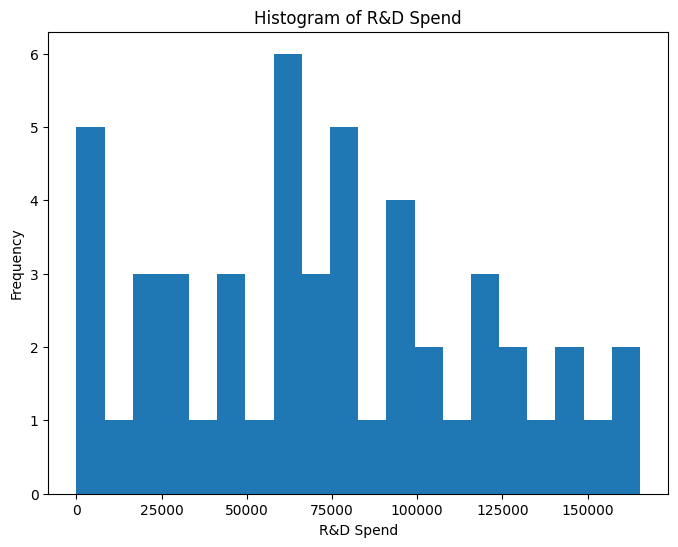

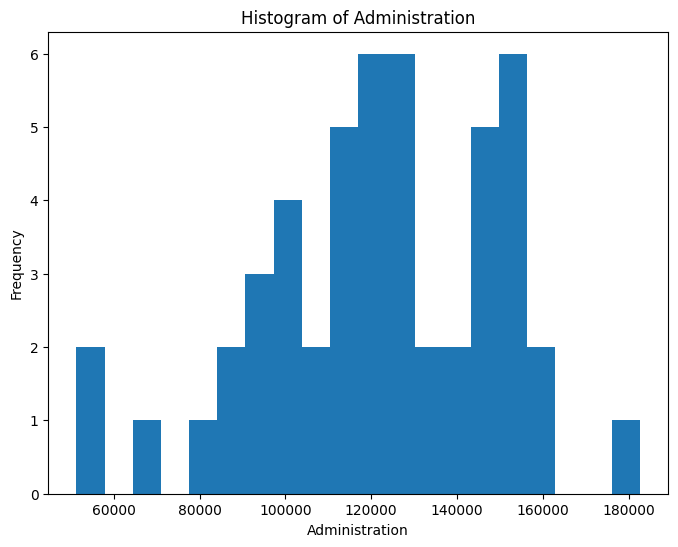

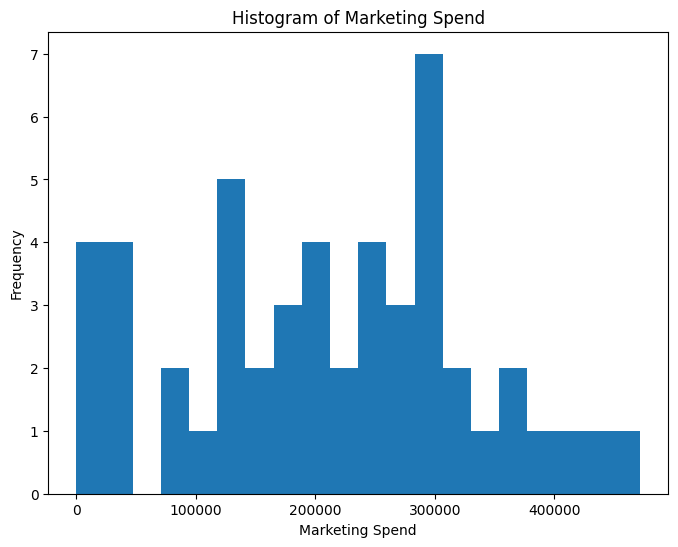

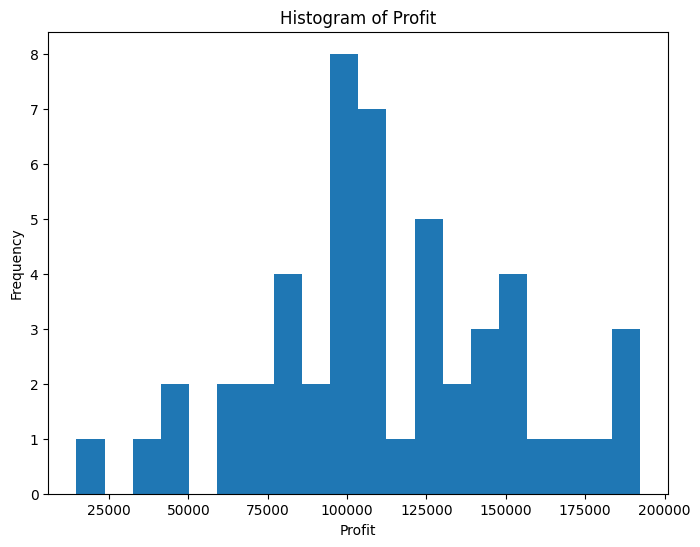

In [17]:


# Select numerical features
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

# Create histograms
for feature in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(data[feature], bins=20)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()